The goal of this TD is to understand the difference between PCA and Kernel based PCA

To perform a PCA based dimension reduction, we need:
<p> 1. to compute the covariance matrix <b> C </b> of the original data <b> X </b>.</p>
<p> 2. to compute the the eigendecomposition of the computed matrix.</p>
<p> 3. to sort the eigen values according to a decreasing order.</p>
<p> 4. to construct the projection matrix <b> W </b> of the k first eigen values.</p>
<p> 5. to transform the data into the projected space $X_{pca} = W^TX $ </p>

Text(0.5, 0, 'x coordinate')

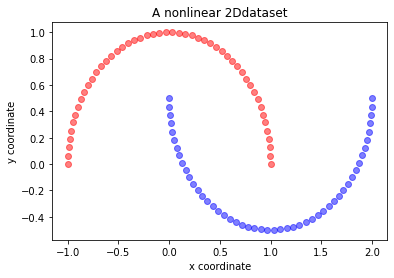

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import numpy as np
X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')


In [ ]:
# init data 
X =np.asarray(X)
y =np.asarray(y)

In [ ]:
# perform PCA based reduction on this data
# keep only the first leading eigen value
# plot the resulting points
moyen1 = sum(X[:,0])/len(X)
moyen2 = sum(X[:,1])/len(X)
#calcul de la moyenne 
Moyen = np.reshape(np.array([moyen1,moyen2]),(1,2))
#initialiser la matrice C variance-covariance
C = np.zeros((2,2)) 
#Calcul de la matrice variance-covariance
for i in range(len(X)):
  C = C + np.matmul(np.transpose(X[0,:] - Moyen),X[0,:] - Moyen )
C = C  / 100
print("Matrice de variance-covariance")
print(C)

Matrice de variance-covariance
[[0.13787758 0.08938293]
 [0.08938293 0.05794494]]


In [ ]:
#calcul des valeurs propres 
W, V = np.linalg.eig(C)
#trouver la valeur prorpe maximale
eigenMax = max(W)
#le premier vecteur propre qui correspond à la valeur max
eigenVec = V[:,0]

In [ ]:
#on redimensionne la matrice des valeurs propres pour effecuer la multiplication matricielle
eigenVec = np.reshape(eigenVec,(2,1))
#matrice X après application de la PCA
Xpca = np.matmul(X,eigenVec)

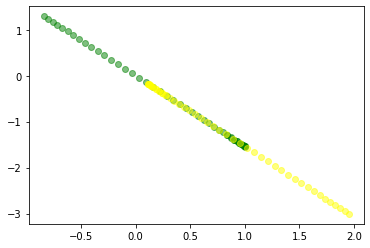

In [ ]:
#displaying the resulting plot 
plt.scatter(Xpca[y==0], (-eigenVec[0] / eigenVec[1] ) * Xpca[y==0], color='green', alpha=0.5)
plt.scatter(Xpca[y==1], (-eigenVec[0] / eigenVec[1] ) * Xpca[y==1], color='yellow', alpha=0.5)

In [80]:
#le seuil de la classification
sueil = lambda x: 1 if x>0.5 else 0

In [81]:
#classifieur lineare
def Linear_classifier(exemples, labels, alpha = 0.01):
  #le nombre d'exemples
  n_samples = exemples.shape[0]
  #les exemples d'apprentissage
  exemples = np.concatenate((np.ones((n_samples,1)),exemples),axis = 1)
  #les caractéristiques
  n_features = exemples.shape[1]
  cpt = 0
  W = np.random.rand(1,n_features)
  while (cpt < 1000):
    for i in range(n_samples):
      y_hat = sueil( np.dot(W,exemples[i,:].T) )
      W = W + alpha*(labels[i]-y_hat)*exemples[1,:]
    cpt = cpt+1
  return W

(1, 2)
(100, 2)


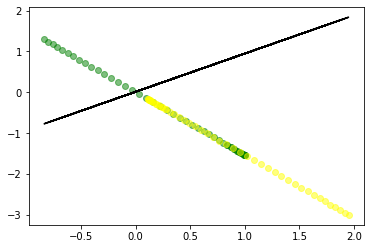

In [140]:
# perform linear classification using your favorite linear classifier
n_samples = 100
#application du classifieur
Result = Linear_classifier(Xpca,y)
print(np.shape(Result))
Xnew = np.concatenate((np.ones((n_samples,1)),Xpca),axis = 1)
print(np.shape(Xnew))
#plotting the results of the classification
plt.scatter(Xpca[y==0], (-eigenVec[0] / eigenVec[1] ) * Xpca[y==0], color='green', alpha=0.5)
plt.scatter(Xpca[y==1], (-eigenVec[0] / eigenVec[1] ) * Xpca[y==1], color='yellow', alpha=0.5)
plt.plot(Xpca,np.matmul(Xnew,np.transpose(Result)),'k')

<p> Kernel functions and the kernel trick: </p>
The basic idea to deal with inseparable data using linear classifiers is to project it onto a higher dimensional space where it becomes linearly separable.
<p> To do so, we: </p>
<p> 1. compute the kernel matrix <b> K </b> using RBF kernel for instance $exp(−\gamma||x_i-x_j||^2)$ </p>
<p> 2. Eigendecompose of the kernel matrix. <b> K </b> </p>
<p> 3. to transform the data into the projected space </p>

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np 
#init data 
X, y = make_moons(n_samples=100, random_state=123)
def rbf_kpca(X, gamma, n_components):
    # Calcul les distances en norme 2
    sq_dists = pdist(X, 'sqeuclidean')    
    mat_sq_dists = squareform(sq_dists)    
    K = exp(-gamma * mat_sq_dists)    
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)    
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]    
    X_pc = np.column_stack([eigvecs[:, i]
    for i in range(n_components)])    
    return X_pc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  # This is added back by InteractiveShellApp.init_path()


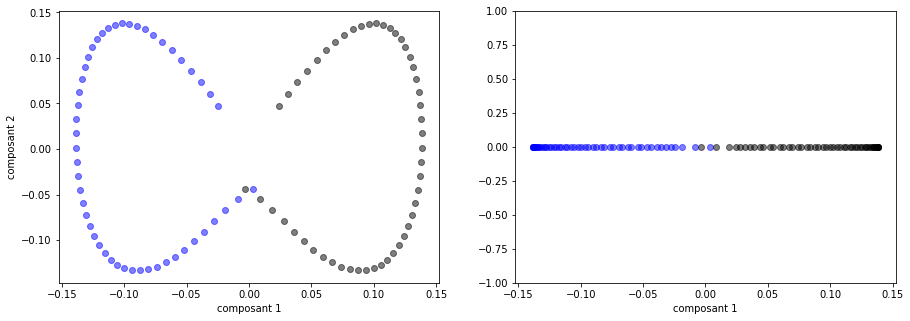

In [139]:
Xkpca = rbf_kpca(X, gamma=10, n_components=2)
figure, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axis[0].scatter(Xkpca[y==0, 0], Xkpca[y==0, 1],color='blue', alpha=0.5)
axis[0].scatter(Xkpca[y==1, 0], Xkpca[y==1, 1],color='black', alpha=0.5)
axis[1].scatter(Xkpca[y==0, 0], np.zeros((50,1)),color='blue', alpha=0.5)
axis[1].scatter(Xkpca[y==1, 0], np.zeros((50,1)),color='black', alpha=0.5)
axis[0].set_xlabel('composant 1')
axis[0].set_ylabel('composant 2')
axis[1].set_ylim([-1, 1])
axis[1].set_xlabel('composant 1')
plt.show()

(1, 3)
(100, 3)


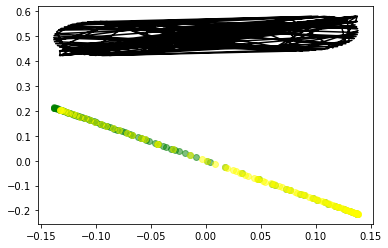

In [141]:
# perform linear classification using your favorite linear classifier
n_samples = 100
#application du classifieur
Result = Linear_classifier(Xkpca,y)
print(np.shape(Result))
Xnew = np.concatenate((np.ones((n_samples,1)),Xkpca),axis = 1)
print(np.shape(Xnew))
#plotting the results of the classification
plt.scatter(Xkpca[y==0], (-eigenVec[0] / eigenVec[1] ) * Xkpca[y==0], color='green', alpha=0.5)
plt.scatter(Xkpca[y==1], (-eigenVec[0] / eigenVec[1] ) * Xkpca[y==1], color='yellow', alpha=0.5)
plt.plot(Xkpca,np.matmul(Xnew,np.transpose(Result)),'k')